#**TEAM NUMBER-7**

## 1. VASUDHA M   -   PES2UG20CS569
## 2. VIJAY J    -    PES2UG20CS815
## 3. D JAYAKIRAN  -  PES2UG20CS903
## 4. G BALA RAHUL SAI - PES2UG20CS907

#**Novel Used - Romeo and Juliet by William Shakespeare**

## Importing Libraries

In [ ]:
import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from operator import itemgetter
import pprint as pprint

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Loading the Dataset

In [ ]:
!wget https://www.gutenberg.org/files/1513/1513-0.txt

--2023-03-19 17:33:38--  https://www.gutenberg.org/files/1513/1513-0.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169293 (165K) [text/plain]
Saving to: ‘1513-0.txt.11’

1513-0.txt.11       100%[===================>] 165.33K  1014KB/s    in 0.2s    

2023-03-19 17:33:39 (1014 KB/s) - ‘1513-0.txt.11’ saved [169293/169293]



In [ ]:
with open('1513-0.txt','r' ) as file:
  data = file.read()

In [ ]:
data = ''.join([i for i in data if not i.isdigit()])

In [ ]:
data = data.lower()

In [ ]:
sentences = sent_tokenize(data)

### a. Make a list of characters in the novel

In [ ]:
characters = ['romeo', 'juliet', 'montague', 'capulet', 'friar lawrence', 'mercutio', 'benvolio', 'tybalt', 'nurse', 'paris', 'prince']

In [ ]:
print(characters)

['romeo', 'juliet', 'montague', 'capulet', 'friar lawrence', 'mercutio', 'benvolio', 'tybalt', 'nurse', 'paris', 'prince']


In [ ]:
char_df = pd.DataFrame(0, index=characters, columns=characters) 
for sentence in sentences:
  for char1 in characters:
      for char2 in characters:
         if (char1 != char2) and char1 in sentence and char2 in sentence:
            char_df[char1][char2] += 1
            char_df[char2][char2] += 1

char_df

,romeo,juliet,montague,capulet,friar lawrence,mercutio,benvolio,tybalt,nurse,paris,prince
romeo,48,11,4,0,1,8,4,10,2,5,3
juliet,11,28,0,3,0,0,0,3,7,3,1
montague,4,0,19,8,0,0,2,1,1,0,3
capulet,0,3,8,31,0,2,0,4,7,4,3
friar lawrence,1,0,0,0,3,0,0,0,0,2,0
mercutio,8,0,0,2,0,28,6,7,1,1,3
benvolio,4,0,2,0,0,6,14,1,1,0,0
tybalt,10,3,1,4,0,7,1,31,0,0,5
nurse,2,7,1,7,0,1,1,0,19,0,0
paris,5,3,0,4,2,1,0,0,0,16,1


In [ ]:
G = nx.Graph()
G = nx.from_pandas_adjacency(char_df)

In [ ]:
print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())

print()

print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data = True))

Number of nodes in the graph: 11
Nodes: ['romeo', 'juliet', 'montague', 'capulet', 'friar lawrence', 'mercutio', 'benvolio', 'tybalt', 'nurse', 'paris', 'prince']

Number of edges in the graph: 45
Edges: [('romeo', 'romeo', {'weight': 48}), ('romeo', 'juliet', {'weight': 11}), ('romeo', 'montague', {'weight': 4}), ('romeo', 'friar lawrence', {'weight': 1}), ('romeo', 'mercutio', {'weight': 8}), ('romeo', 'benvolio', {'weight': 4}), ('romeo', 'tybalt', {'weight': 10}), ('romeo', 'nurse', {'weight': 2}), ('romeo', 'paris', {'weight': 5}), ('romeo', 'prince', {'weight': 3}), ('juliet', 'juliet', {'weight': 28}), ('juliet', 'capulet', {'weight': 3}), ('juliet', 'tybalt', {'weight': 3}), ('juliet', 'nurse', {'weight': 7}), ('juliet', 'paris', {'weight': 3}), ('juliet', 'prince', {'weight': 1}), ('montague', 'montague', {'weight': 19}), ('montague', 'capulet', {'weight': 8}), ('montague', 'benvolio', {'weight': 2}), ('montague', 'tybalt', {'weight': 1}), ('montague', 'nurse', {'weight': 1}),

### b.Extract a social graph of the manually identified characters in the text

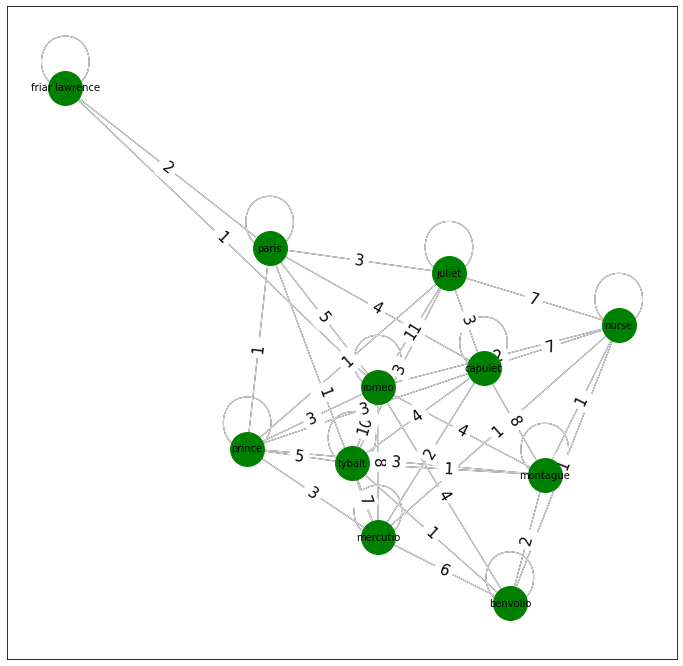

In [ ]:
plt.figure(3,figsize =(12,12))
pos = nx.fruchterman_reingold_layout(G)
nx.draw_networkx(G, pos =  pos , node_size = 1150, font_size = 10 ,node_color = 'green')
nx.draw_networkx_edges(G, pos = pos, edge_color='#E5E7E9',width = 1)
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos = pos,edge_labels =edge_labels,font_size = 15)
plt.show()


### c. Calculate the four types of centrality of main protagonists i.e. degree,betweenness, closeness, PageRank 

[('romeo', 1.1), ('capulet', 0.9), ('mercutio', 0.9), ('tybalt', 0.9), ('prince', 0.9), ('juliet', 0.8), ('montague', 0.8), ('nurse', 0.8), ('paris', 0.8), ('benvolio', 0.7000000000000001), ('friar lawrence', 0.4)]


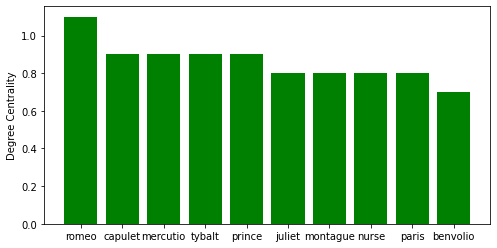

In [ ]:
#degree centrality
from operator import itemgetter
degc = nx.degree_centrality(G)
fin_list = sorted(degc.items(), key = itemgetter(1), reverse = True)
print(fin_list)
    
fin_list = fin_list[0:10]
people = list(zip(*fin_list))[0]
score = list(zip(*fin_list))[1]
x_pos = np.arange(len(people))
plt.figure(figsize =(8,4))
plt.bar(x_pos,score,align = 'center',color = 'green')
plt.xticks(x_pos,people)
plt.ylabel('Degree Centrality')
plt.show()

[('romeo', 0.18370370370370373), ('paris', 0.06243386243386244), ('mercutio', 0.04354497354497355), ('capulet', 0.03740740740740741), ('tybalt', 0.033544973544973544), ('nurse', 0.02798941798941799), ('prince', 0.026878306878306876), ('montague', 0.022433862433862434), ('juliet', 0.021322751322751323), ('benvolio', 0.007407407407407408), ('friar lawrence', 0.0)]


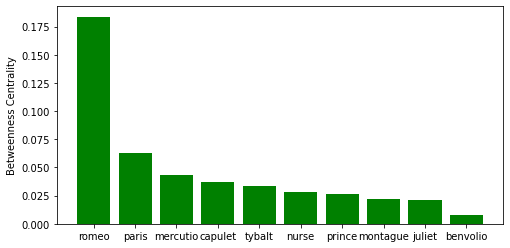

In [ ]:
# betweenness centrality
from operator import itemgetter
betc = nx.betweenness_centrality(G)
fin_list = sorted(betc.items(), key = itemgetter(1), reverse = True)
print(fin_list)
    
fin_list = fin_list[0:10]
people = list(zip(*fin_list))[0]
score = list(zip(*fin_list))[1]
x_pos = np.arange(len(people))
plt.figure(figsize =(8,4))
plt.bar(x_pos,score,align = 'center',color = 'green')
plt.xticks(x_pos,people)
plt.ylabel('Betweenness Centrality')
plt.show()

[('romeo', 0.9090909090909091), ('capulet', 0.7692307692307693), ('mercutio', 0.7692307692307693), ('tybalt', 0.7692307692307693), ('prince', 0.7692307692307693), ('juliet', 0.7142857142857143), ('montague', 0.7142857142857143), ('nurse', 0.7142857142857143), ('paris', 0.7142857142857143), ('benvolio', 0.6666666666666666), ('friar lawrence', 0.5555555555555556)]


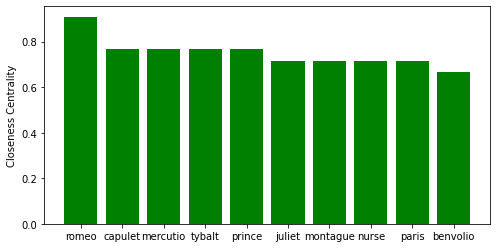

In [ ]:
# closeness centrality
from operator import itemgetter
closc = nx.closeness_centrality(G)
fin_list = sorted(closc.items(), key = itemgetter(1), reverse = True)
print(fin_list)
    
fin_list = fin_list[0:10]
people = list(zip(*fin_list))[0]
score = list(zip(*fin_list))[1]
x_pos = np.arange(len(people))
plt.figure(figsize =(8,4))
plt.bar(x_pos,score,align = 'center',color = 'green')
plt.xticks(x_pos,people)
plt.ylabel('Closeness Centrality')
plt.show()

[('romeo', 0.1673209495588331), ('capulet', 0.11564827393517593), ('tybalt', 0.10875038332546749), ('mercutio', 0.10304420551072835), ('juliet', 0.10259906281796154), ('paris', 0.07794066231528497), ('montague', 0.07705527151277523), ('prince', 0.07614315189643954), ('nurse', 0.07611405125335563), ('benvolio', 0.06189030035891857), ('friar lawrence', 0.033493687515059725)]


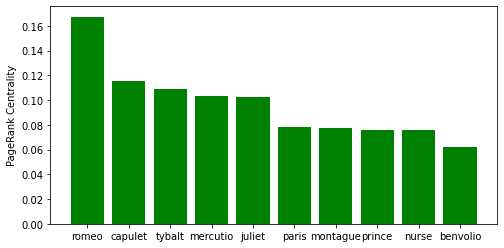

In [ ]:
# pagerank
from operator import itemgetter
prc = nx.pagerank(G)
fin_list = sorted(prc.items(), key = itemgetter(1), reverse = True)
print(fin_list)
    
fin_list = fin_list[0:10]
people = list(zip(*fin_list))[0]
score = list(zip(*fin_list))[1]
x_pos = np.arange(len(people))
plt.figure(figsize =(8,4))
plt.bar(x_pos,score,align = 'center',color = 'green')
plt.xticks(x_pos,people)
plt.ylabel('PageRank Centrality')
plt.show()

In [ ]:
import seaborn as sns
centrality_measures = {
    'degree' : degc,
    'betweenness': betc,
    'closeness': closc,
    'pagerank': prc,
}
 
centrality = pd.DataFrame(centrality_measures)
centrality

,degree,betweenness,closeness,pagerank
romeo,1.1,0.183704,0.909091,0.167321
juliet,0.8,0.021323,0.714286,0.102599
montague,0.8,0.022434,0.714286,0.077055
capulet,0.9,0.037407,0.769231,0.115648
friar lawrence,0.4,0.000000,0.555556,0.033494
mercutio,0.9,0.043545,0.769231,0.103044
benvolio,0.7,0.007407,0.666667,0.061890
tybalt,0.9,0.033545,0.769231,0.108750
nurse,0.8,0.027989,0.714286,0.076114
paris,0.8,0.062434,0.714286,0.077941


In [ ]:
c_degree = list(degc.values())
c_betweenness = list(betc.values())
c_closeness = list(closc.values())
c_pagerank = list(prc.values())

Text(0.5, 1.0, 'Betweenness Centrality')

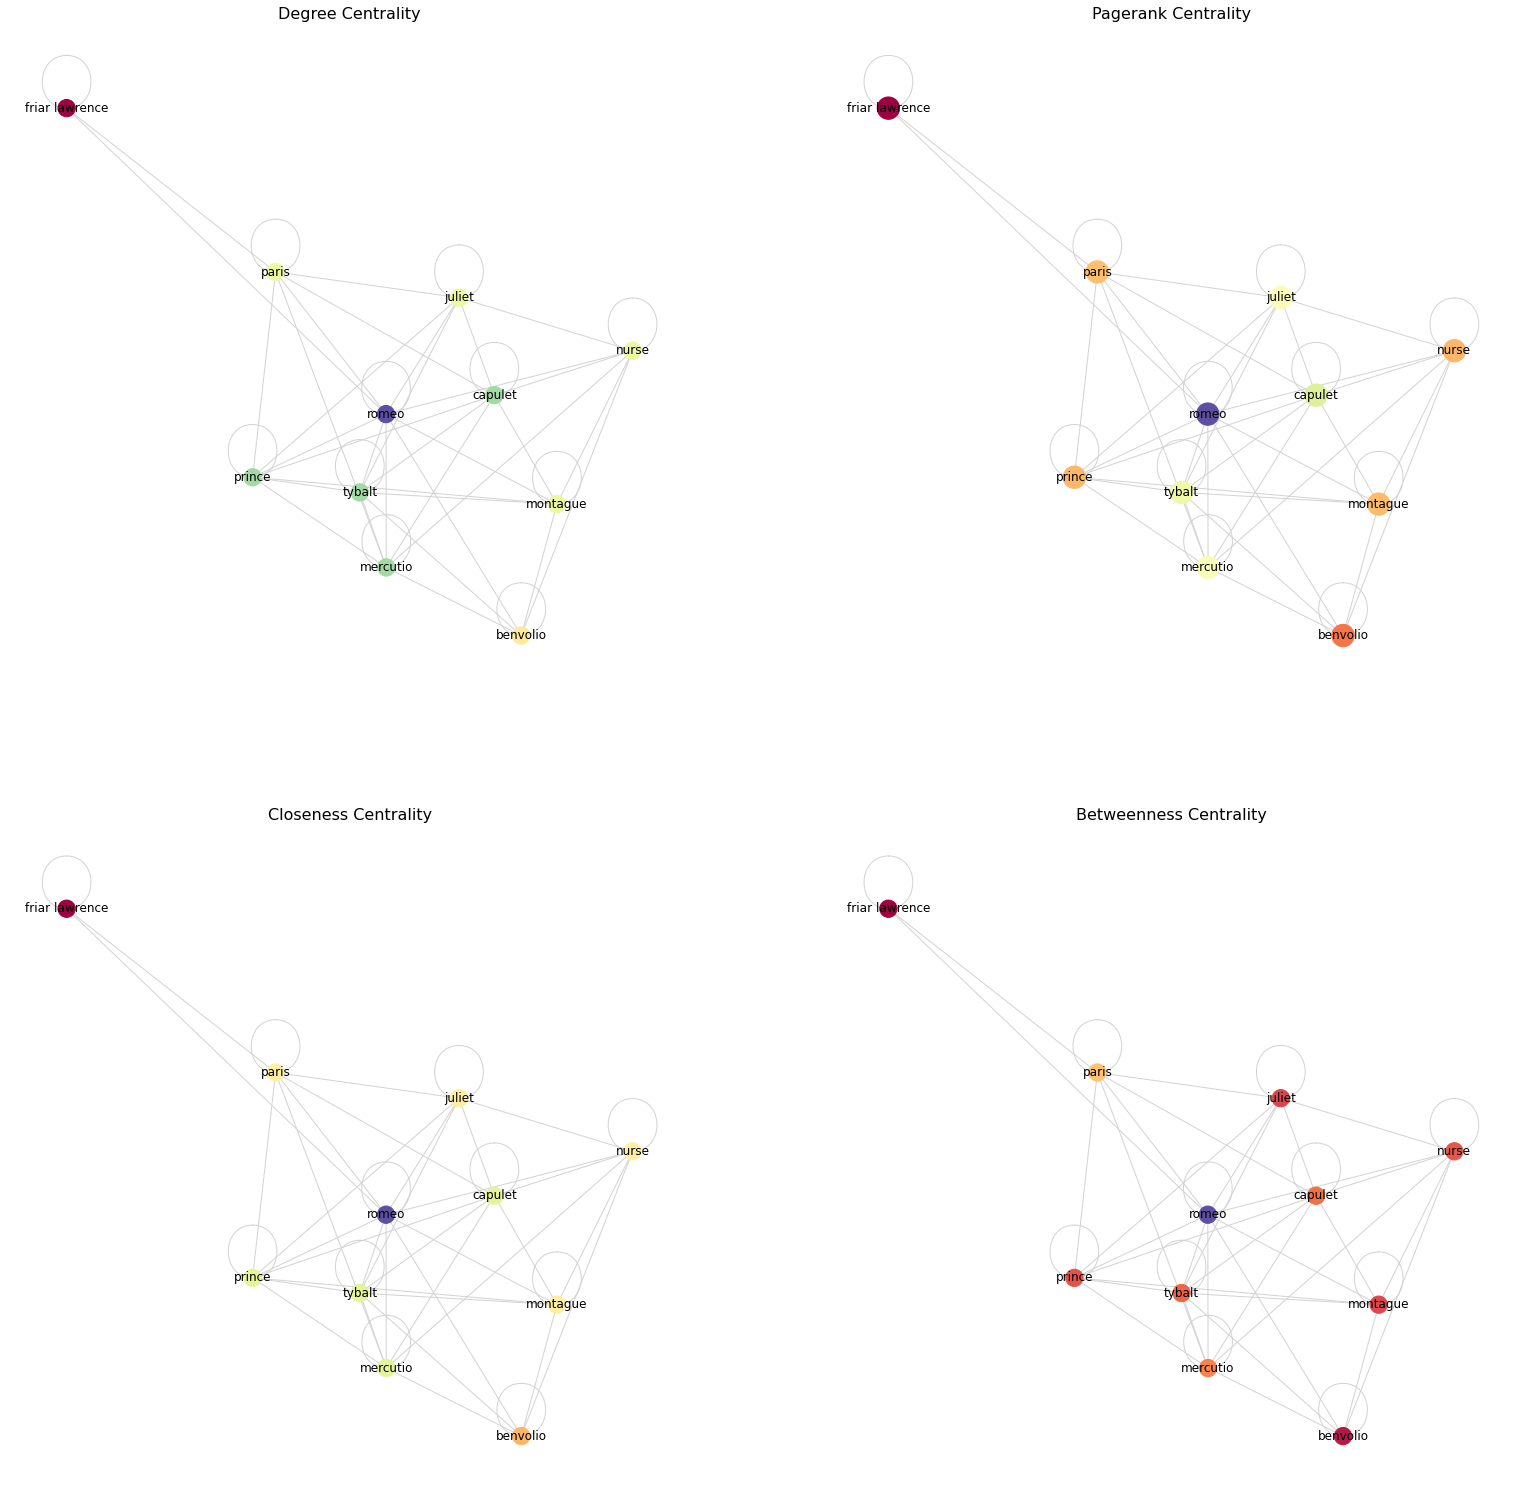

In [ ]:
plt.figure(figsize=(27, 27))
# Degree Centrality
f, axarr = plt.subplots(2, 2, num=1)
plt.sca(axarr[0,0])
nx.draw(G, cmap = plt.get_cmap('Spectral'), node_color = c_degree, node_size=300, edge_color='#D3D3D3', pos=pos, with_labels=True)
axarr[0,0].set_title('Degree Centrality', size=16)
# PageRank Centrality
plt.sca(axarr[0,1])
nx.draw(G, cmap = plt.get_cmap('Spectral'), node_color = c_pagerank, node_size=500, pos=pos, with_labels=True, edge_color='#D3D3D3', font_size=12)
axarr[0,1].set_title('Pagerank Centrality', size=16)
# Closeness Centrality
plt.sca(axarr[1,0])
nx.draw(G, cmap = plt.get_cmap('Spectral'), node_color = c_closeness, node_size=300, pos=pos, edge_color='#D3D3D3',with_labels=True)
axarr[1,0].set_title('Closeness Centrality', size=16)
# Betweenness Centrality
plt.sca(axarr[1,1])
nx.draw(G, cmap = plt.get_cmap('Spectral'), node_color = c_betweenness, node_size=300, pos=pos, edge_color='#D3D3D3', with_labels=True)
axarr[1,1].set_title('Betweenness Centrality', size=16)

### d.Calculate the global clustering coefficient of your graph and local clustering coefficient of the main protagonist nodes

In [ ]:
d = nx.clustering(G)
print({k: v for k,v in sorted(d.items(),key = lambda item: item[1],reverse= True)})

{'friar lawrence': 1.0, 'benvolio': 0.8, 'prince': 0.7142857142857143, 'juliet': 0.6666666666666666, 'montague': 0.6666666666666666, 'tybalt': 0.6666666666666666, 'capulet': 0.6190476190476191, 'mercutio': 0.6190476190476191, 'nurse': 0.6, 'paris': 0.6, 'romeo': 0.5}


In [ ]:
print(nx.average_clustering(G))

0.6774891774891775


### e. Detect communities using the following methods:

#### i. K - clique (percolation method)

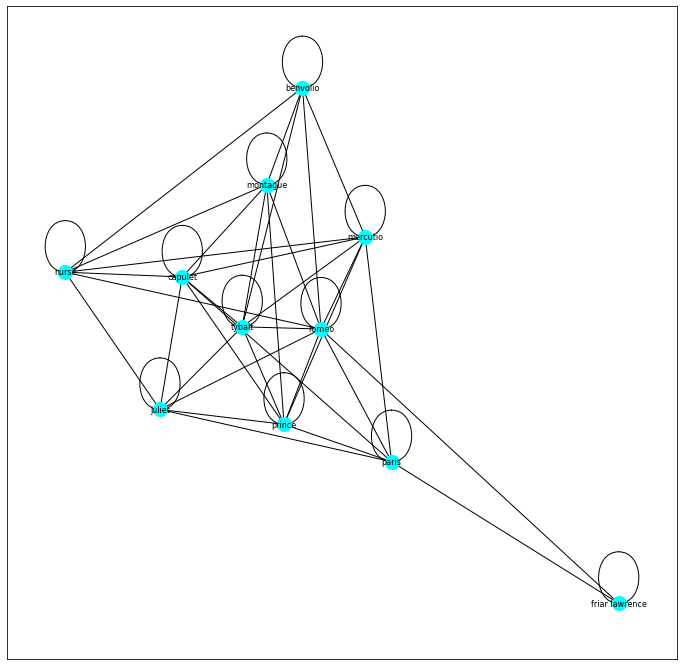

In [ ]:
plt.figure(3, figsize=(12,12))
nx.draw_networkx(G,with_labels=True, node_size=200, font_size = 8, node_color='cyan')

In [ ]:
list(nx.find_cliques(G))  

[['romeo', 'friar lawrence', 'paris'],
 ['romeo', 'nurse', 'juliet'],
 ['romeo', 'nurse', 'benvolio', 'montague'],
 ['romeo', 'nurse', 'benvolio', 'mercutio'],
 ['romeo', 'paris', 'prince', 'juliet'],
 ['romeo', 'paris', 'prince', 'mercutio'],
 ['romeo', 'tybalt', 'prince', 'juliet'],
 ['romeo', 'tybalt', 'prince', 'montague'],
 ['romeo', 'tybalt', 'prince', 'mercutio'],
 ['romeo', 'tybalt', 'benvolio', 'montague'],
 ['romeo', 'tybalt', 'benvolio', 'mercutio'],
 ['capulet', 'prince', 'paris', 'juliet'],
 ['capulet', 'prince', 'paris', 'mercutio'],
 ['capulet', 'prince', 'tybalt', 'juliet'],
 ['capulet', 'prince', 'tybalt', 'montague'],
 ['capulet', 'prince', 'tybalt', 'mercutio'],
 ['capulet', 'nurse', 'juliet'],
 ['capulet', 'nurse', 'montague'],
 ['capulet', 'nurse', 'mercutio']]

In [ ]:
synthetic = nx.make_max_clique_graph(G)  
print(synthetic.edges())

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 13), (1, 16), (1, 17), (1, 18), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 14), (2, 16), (2, 17), (2, 18), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 12), (3, 15), (3, 16), (3, 17), (3, 18), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 18), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (6, 16), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (7, 17), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (8, 18), (9, 10), (9, 13), (9, 14), (9, 15), (9, 17), (10, 12), (10, 13), (10, 14), (10, 15), (10, 18), (11, 12), (11, 13), (11, 14), (11, 15), (11, 16),

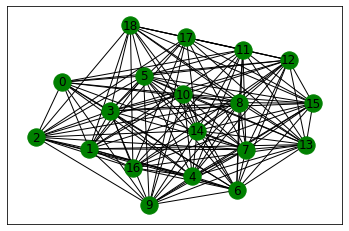

In [ ]:
nx.draw_networkx(synthetic,node_color='green')

In [ ]:
from networkx.algorithms.community import k_clique_communities  # find k-clique community using percolation method
c = list(k_clique_communities(G, 9))
print(c)

[]


In [ ]:
print(len(list(c)))

0


#### ii. Louvain community detection

In [ ]:
import community.community_louvain as community_louvain
part = community_louvain.best_partition(G)
print(part)
communities = {}
for p in part.keys():
  key = part[p]
  if key in communities:
    communities[key].append(p)
  else:
    communities[key] = [p]

from itertools import zip_longest

zl = list(zip_longest(*communities.values()))

comm_df = pd.DataFrame(zl, columns=communities.keys())
pprint.pprint(communities)
comm_df

{'romeo': 0, 'juliet': 1, 'montague': 2, 'capulet': 2, 'friar lawrence': 3, 'mercutio': 6, 'benvolio': 6, 'tybalt': 5, 'nurse': 1, 'paris': 3, 'prince': 4}
{0: ['romeo'],
 1: ['juliet', 'nurse'],
 2: ['montague', 'capulet'],
 3: ['friar lawrence', 'paris'],
 4: ['prince'],
 5: ['tybalt'],
 6: ['mercutio', 'benvolio']}


,0,1,2,3,6,5,4
0,romeo,juliet,montague,friar lawrence,mercutio,tybalt,prince
1,None,nurse,capulet,paris,benvolio,None,None


In [ ]:
print(community_louvain.modularity(part, G))

0.56695556640625


In [ ]:
induced = community_louvain.induced_graph(part, G)
print(induced.nodes())
print(induced.edges())

[0, 1, 2, 3, 6, 5, 4]
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 6), (0, 5), (0, 4), (1, 1), (1, 2), (1, 5), (1, 3), (1, 4), (1, 6), (2, 2), (2, 6), (2, 5), (2, 4), (2, 3), (3, 3), (3, 6), (3, 4), (6, 6), (6, 5), (6, 4), (5, 5), (5, 4), (4, 4)]


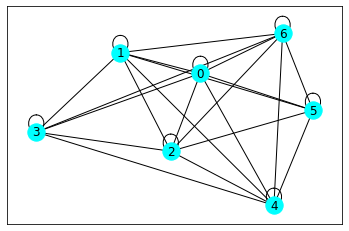

In [ ]:
nx.draw_networkx(induced,node_color='cyan')

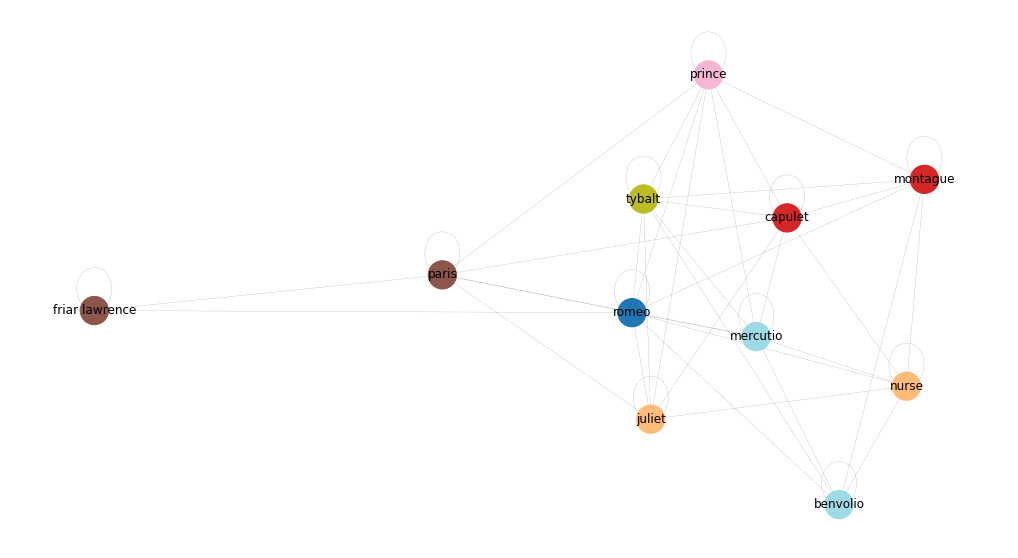

In [ ]:
pos = nx.spring_layout(G)
plt.figure(figsize=(18, 10))
plt.axis('off')
nx.draw_networkx_nodes(G, pos, part.keys(), node_size=800, cmap=plt.cm.tab20, node_color=list(part.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.3)
nx.draw_networkx_labels(G, pos=pos)
plt.show(G)

#### iii. Girvann Newman

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman
import community
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['benvolio',
  'capulet',
  'juliet',
  'mercutio',
  'montague',
  'nurse',
  'prince',
  'romeo',
  'tybalt'],
 ['friar lawrence'],
 ['paris']]

#### f. Find the degree distribution, average shortest path, and size of the largest component. Also create equivalent generative models to compare against the social graph that you extracted

#### Degree Distribution ,Avg. Shortest Path

In [ ]:
N,K = G.order(), G.size()
avg_deg = float(K)/N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

Nodes:  11
Edges:  45
Average degree:  4.090909090909091


[Text(11.4, 0, '11'),
 Text(9.4, 0, '9'),
 Text(8.4, 0, '8'),
 Text(7.4, 0, '7'),
 Text(4.4, 0, '4')]

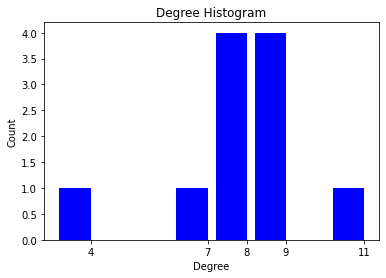

In [ ]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)



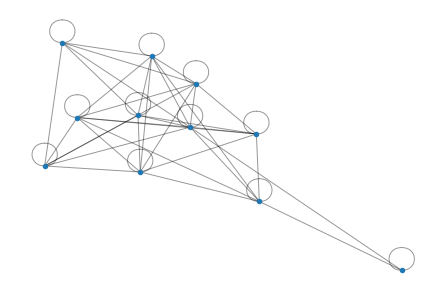

In [ ]:
 #draw graph in inset
plt.axes([0.8, 0.8, 1.0, 1.0])
A = (G.subgraph(c) for c in nx.connected_components(G))
Gcc = sorted(A, key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

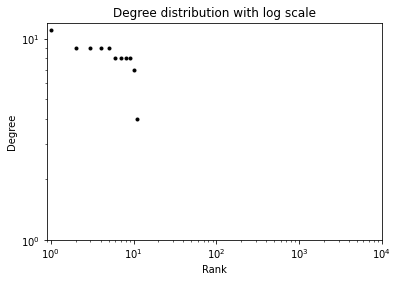

In [ ]:
# Degree distribution 
degrees = G.degree()
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

plt.loglog(range(1,G.order()+1),degree_sequence,'k.')
plt.title("Degree distribution with log scale")
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.ylim(1,max(degree_sequence)+1)
plt.xlim(.9,10001)
plt.savefig("degree_distribution.png")

#### Avg. Shortest Path

In [ ]:
print("Average Shortest Path Length:\n",nx.average_shortest_path_length(G))

Average Shortest Path Length:
 1.3818181818181818


Avg. Clustering Coefficient

In [ ]:
print("Average Clustering Coefficient:\n", nx.average_clustering(G))

Average Clustering Coefficient:
 0.6774891774891775


#### Size of Largest Component

In [ ]:
largest = max(nx.connected_components(G), key=len)
print("Size of largest component:")
len(largest)

Size of largest component:


11

## Equivalent generative models

In [ ]:
nodes=G.number_of_nodes()
nodes

11

In [ ]:
#calculate average degree to use with random graph models 

degree_list = list(nx.degree(G))
print(degree_list)
no_nodes=len(degree_list)
total_degree=0
for node in degree_list[:5]:
    print("Node ", node[0], " : Degree is ", node[1])
    total_degree=total_degree+ node[1]
avg_degree= total_degree/no_nodes
avg_degree

[('romeo', 11), ('juliet', 8), ('montague', 8), ('capulet', 9), ('friar lawrence', 4), ('mercutio', 9), ('benvolio', 7), ('tybalt', 9), ('nurse', 8), ('paris', 8), ('prince', 9)]
Node  romeo  : Degree is  11
Node  juliet  : Degree is  8
Node  montague  : Degree is  8
Node  capulet  : Degree is  9
Node  friar lawrence  : Degree is  4


3.6363636363636362

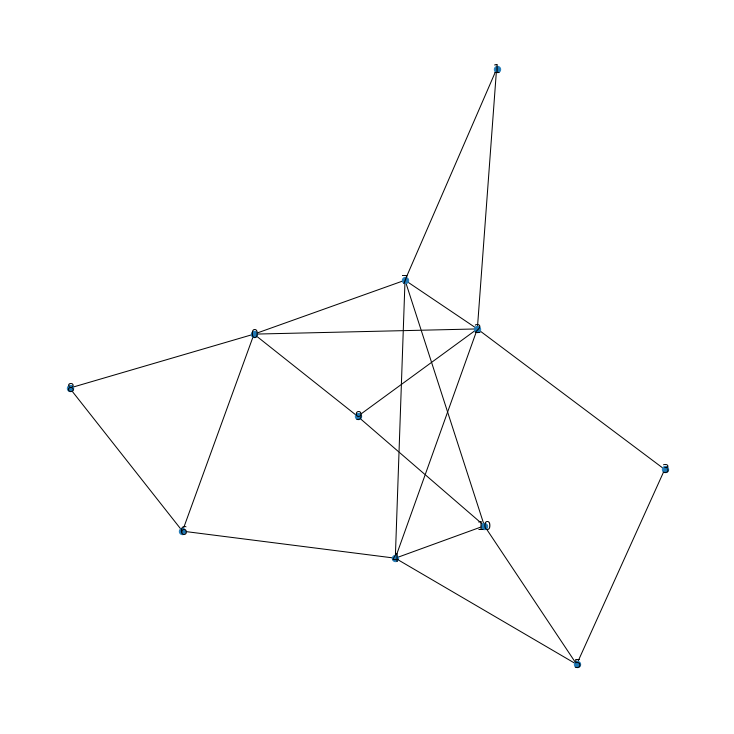

In [ ]:
p=avg_degree/(no_nodes-1)
G1 = nx.gnp_random_graph(no_nodes,p)
fig = plt.figure(figsize =(10 ,10))
nx.draw(G1, with_labels = True, node_size = 40, linewidths = 1, width =1)
plt.show()

#e. Detect  communities  

#### i. G(n,p)

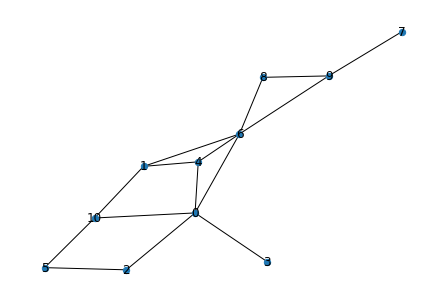

Average Shortest Path Length: 2.2181818181818183
Average Clustering Coefficient: 0.24848484848484853
Size of largest component: 11


In [ ]:
n = 11
p = 0.3

G_np = nx.erdos_renyi_graph(n, p)

nx.draw(G_np, with_labels=True, node_size = 40, linewidths = 1, width = 1)
plt.show()

print("Average Shortest Path Length:",nx.average_shortest_path_length(G_np))
print("Average Clustering Coefficient:", nx.average_clustering(G_np))
largest = max(nx.connected_components(G_np), key=len)
print("Size of largest component:",len(largest))


###G(n,m)

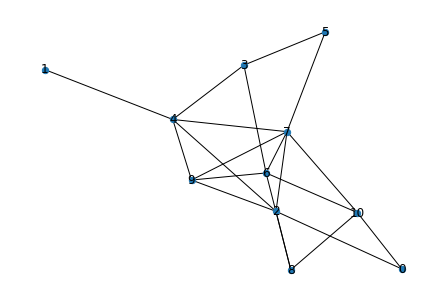

Average Shortest Path Length: 1.7818181818181817
Average Clustering Coefficient: 0.2333333333333333
Size of largest component: 11


In [ ]:
n = 11
m = 20
seed = 10024
G_nm = nx.gnm_random_graph(n, m, seed=seed)
pos = nx.spring_layout(G_nm, seed=seed) 
nx.draw(G_nm, pos=pos,with_labels=True, node_size = 40, linewidths = 1, width = 1)
plt.show()
print("Average Shortest Path Length:",nx.average_shortest_path_length(G_nm))
print("Average Clustering Coefficient:", nx.average_clustering(G_nm))
largest = max(nx.connected_components(G_nm), key=len)
print("Size of largest component:",len(largest))

#### ii. Preferential attachment

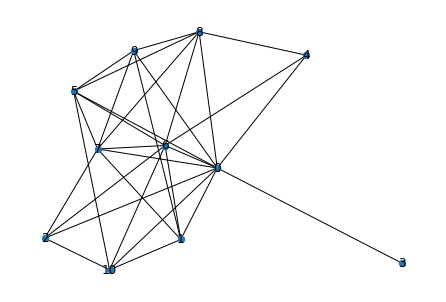

Average Shortest Path Length: 1.4545454545454546
Average Clustering Coefficient: 0.652958152958153
Size of largest component: 11


In [ ]:
n = 11
m = 5
G_barbasi = nx.barabasi_albert_graph(n, m)
avg_path_length = nx.average_shortest_path_length(G_barbasi)
nx.draw(G_barbasi, with_labels = True, node_size = 40, linewidths = 1, width = 1)
plt.show()
print("Average Shortest Path Length:",nx.average_shortest_path_length(G_barbasi))
print("Average Clustering Coefficient:", nx.average_clustering(G_barbasi))
largest = max(nx.connected_components(G_barbasi), key=len)
print("Size of largest component:",len(largest))

#### iii.Small-world model

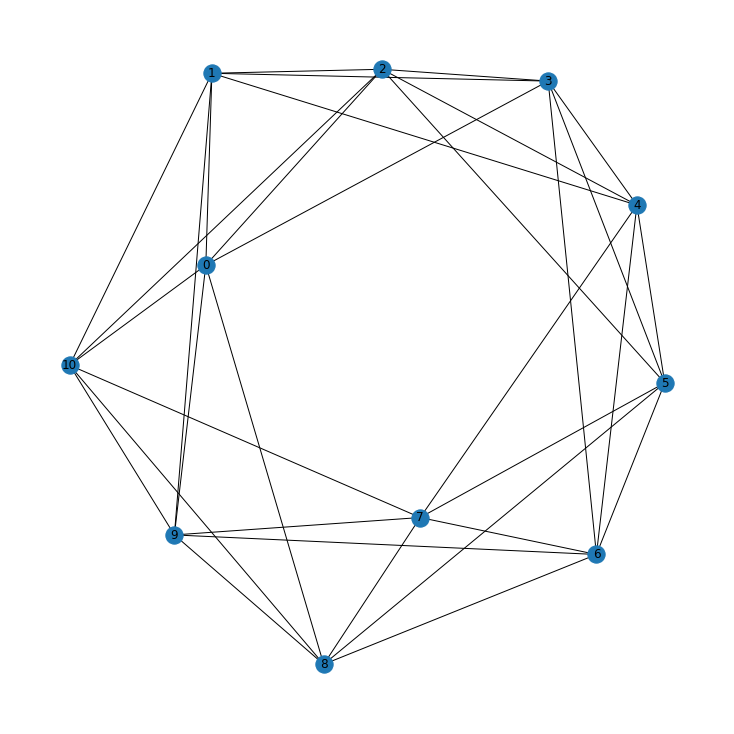

Average Shortest Path Length: 1.4
Average Clustering Coefficient: 0.5999999999999999
Size of largest component: 11


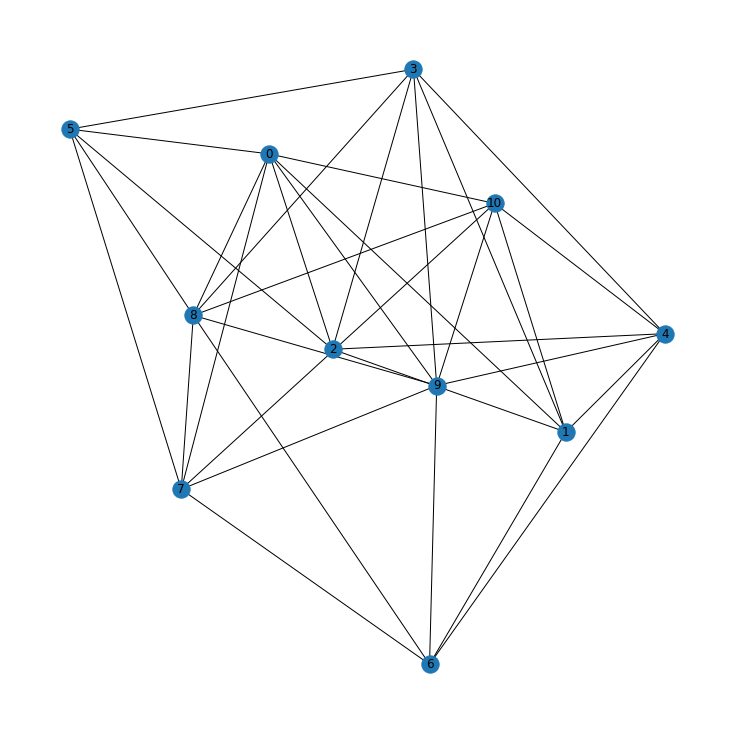

Average Shortest Path Length: 1.4
Average Clustering Coefficient: 0.5545454545454546
Size of largest component: 11


In [ ]:
n_nodes = 11
n_neighbors = 6
G_watts = nx.watts_strogatz_graph(n_nodes, n_neighbors, 0)
fig = plt.figure(figsize =(10 ,10))
nx.draw(G_watts, with_labels = True);
plt.show();
print("Average Shortest Path Length:",nx.average_shortest_path_length(G_watts))
print("Average Clustering Coefficient:", nx.average_clustering(G_watts))
largest = max(nx.connected_components(G_watts), key=len)
print("Size of largest component:",len(largest))
G_rewire = nx.watts_strogatz_graph(n_nodes, n_neighbors, 0.3)
fig = plt.figure(figsize =(10 ,10))
nx.draw(G_rewire, with_labels = True);
plt.show();
print("Average Shortest Path Length:",nx.average_shortest_path_length(G_rewire))
print("Average Clustering Coefficient:", nx.average_clustering(G_rewire))
largest = max(nx.connected_components(G_rewire), key=len)
print("Size of largest component:",len(largest))

## 2.Analysis

### a. Who are the protagonists as per your analysis? If the 4 centralities are not having high correlation, how do you interpret them?

By studying all four centrality measures, it can be determined that Romeo and Juliet are the main protagonists in William Shakespeare's "Romeo and Juliet". Despite the existence of other prominent characters such as Friar Lawrence and the Nurse, Romeo and Juliet rank first across all centrality metrics, suggesting their essential position in the plot.

When there is a lack of strong correlation between the four centralities, it means that some characteristics may be significant in some cases but not in others. Understanding the character's relevance requires taking into account each centrality metric separately as well as in conjuction.

### b. What do the clustering coefficients, discovered communities, extracted ego network of protagonists and average shortest path tell you about the dynamics in the story? How is clustering coefficient related to transitivity of nodes?

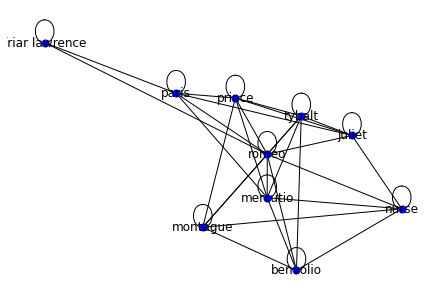

In [ ]:

f='romeo'
hub_ego=nx.ego_graph(G,f)

pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=True)
plt.show()

The clustering coefficient can reveal the degree to which characters or groups of characters are interconnected. A high clustering coefficient indicates that characters tend to form communities, whereas a low one indicates that characters interactions are looser or more fragmented. 
Finding communities in a novel can show patterns of character interactions that are not immediately obvious from the plot. Communities are groups of characters who have greater bonds with one another than with other characters. 
An ego network is a subgraph of a larger network that consists of a focus node and all nodes directly connected to it. Studying a protagonist's ego network might give information about the character's interactions with other characters and their importance in the plot. 
The average shortest path can demonstrate how far apart characters are and how easily they can affect each other.

### c. Compare all the generated graphs (from (f)) to the actual graph. Is there a difference, and if yes, what can it be attributed to? Also, analyze the differences between the 3 generated graph’s attributes

There is a discrepancy between the three graphs generated and the social graph. When compared to the original graph, which contains 11 connections between the characters, Watz strogatz's network creates circular connections. This means that there is a shortest path connecting each node and that these nodes are likely to be related to one another.
The social network built from a novel has a higher density than the generated graphs because characters in the story interact with one other more frequently.
The community structure of a novel's social graph reflects the story's natural groupings of characters, whereas the community structure of generated graphs is impacted by the graph generation model.